TM10007: Machine learning
Week 1, lecture 1: Introduction to Classifiers¶
In this exercise, you will learn how to use different classifiers using scikit learn.


In [0]:
!pip install sklearn numpy matplotlib

In [0]:
# General packages
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import metrics
 
# Metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# some function that we will use
from sklearn.decomposition import PCA

def colorplot(clf, ax, x, y, h=100, precomputer=None):
    '''
    Overlay the decision areas as colors in an axes.
    
    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    features = np.c_[xx.ravel(), yy.ravel()]
    if precomputer is not None:
        if type(precomputer) is RBFSampler:
            features = precomputer.transform(features)
        elif precomputer is rbf_kernel:
            features = rbf_kernel(features, X)
            
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(features)
    else:
        Z = clf.predict_proba(features)
    if len(Z.shape) > 1:
        Z = Z[:, 1]
    
    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm
    
def load_breast_cancer(n_features=2):
    '''
    Load the sklearn breast data set, but reduce the number of features with PCA.
    '''
    data = ds.load_breast_cancer()
    x = data['data']
    y = data['target']
    
    p = PCA(n_components=n_features)
    p = p.fit(x)
    x = p.transform(x)
    return x, y

We will create a dataset and then classify it with a linear classifier

Number of mislabeled points out of a total 100 points : 5


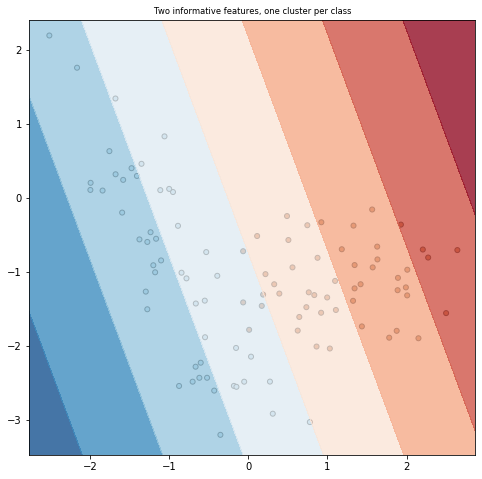

In [0]:
X1, Y1 = ds.make_classification(n_samples=100, n_features=2, n_redundant=0,
                                n_informative=2,
                                n_clusters_per_class=1)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_title("Two informative features, one cluster per class",
             fontsize='small')
ax.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
           s=25, edgecolor='k', cmap=plt.cm.Paired)
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X1, Y1)
y_pred = lda.predict(X1)
colorplot(lda, ax, X1[:, 0], X1[:, 1])
print("Number of mislabeled points out of a total %d points : %d" % (X1.shape[0], (Y1 != y_pred).sum()))



Create three example datasets

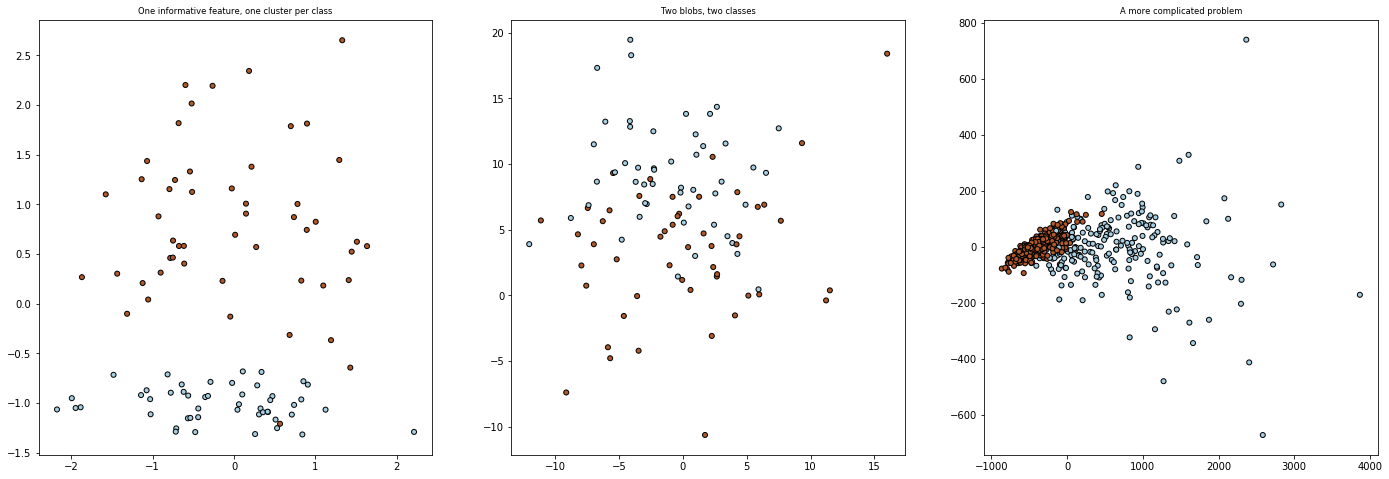

In [0]:
X2, Y2 = ds.make_classification(n_samples=100, n_features=2, n_redundant=0,
                                n_informative=1,
                                n_clusters_per_class=1)
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(131)
ax.set_title("One informative feature, one cluster per class", fontsize='small')
ax.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
           s=25, edgecolor='k', cmap=plt.cm.Paired)

X3, Y3 = ds.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=5)
ax = fig.add_subplot(132)
ax.set_title("Two blobs, two classes", fontsize='small')
ax.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k', cmap=plt.cm.Paired)

X4, Y4 = load_breast_cancer()
ax = fig.add_subplot(133)
ax.set_title("A more complicated problem", fontsize='small')
ax.scatter(X4[:, 0], X4[:, 1], marker='o', c=Y4, s=25, edgecolor='k', cmap=plt.cm.Paired)



Try out the different classifiers with the different datasets

In [0]:
#   - GaussianNB
#   - LinearDiscriminantAnalysis
#   - QuadraticDiscriminantAnalysis
#   - LogisticRegression
#   - SGDClassifier
#   - KNeighborsClassifier
#   Motivate your choice. You can use the example code below to loop over both
#   the datasets and the classifiers at the same time:


clsfs = [LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),GaussianNB(), 
         LogisticRegression(),SGDClassifier(),KNeighborsClassifier()]
Xs = [X2, X3, X4]
Ys = [Y2, Y3, Y4]
clfs_fit = list()

# First make a plot without classifiers:
fig = plt.figure(figsize=(21,7*len(clsfs)))
num = 0  # Iteration number for the subplots
for X, Y in zip(Xs, Ys):
    ax = fig.add_subplot(6, 3, num + 1)
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
               s=25, edgecolor='k', cmap=plt.cm.Paired)
    num += 1

# Fit the classifiers and add them to the plot
num=0 
Xt=list()
Yt=list()
for clf in clsfs:
    for X, Y in zip(Xs, Ys):
        # Fit classifier
        clf.fit(X,Y)
        y_pred=clf.predict(X)
        # Predict labels using fitted classifier

        # Make scatterplot of features
        ax = fig.add_subplot(6, 3, num + 1)
        ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
               s=25, edgecolor='k', cmap=plt.cm.Paired)
        colorplot(clf, ax, X[:,0], X[:,1])
        # Add overlay through colorplot function
        t=("Misclass: %d / %d" % ((Y!=y_pred).sum(), X.shape[0]))
        ax.set_title(t)
        num+=1

        clfs_fit.append(clf)
        Xt.append(X)
        Yt.append(Y)

We have already identified what you should do in the loop:
 1. Fit the classifier on the features.
 2. Predict the labels on the features from the same dataset.
 3. Make a scatterplot of the features and label the points  with their
    true labels (not the predicted ones) as we did above. Use the colorplot function to overlay the decision boundary.
 4. Put the number of misclassified samples in the title of the plot.
Plot the results of all classifiers on a single dataset in a single figure. The result will thus be three figures, each with six subplots. Play around with the different parameters for each classifier and pick some values that you think work best in each case. Motivate your choices.

Note: the KNeighborsClassifier does not need the labels!

2. Which classifier works best on which dataset? Why? Can you deduce from the scatterplot of the features which classifier might work best?

3. Also try the DecisionTreeClassifier classifier and make the same plots.
This classifier will perform better than the other ones. However, looking at the colorplot, you will see that it overfits on this dataset. The
decision boundary will not generalize well if we add other samples. 

Picking the right classifier for a problem is a challenging task.
The distribution of the features and the complexity of the problem
may give you some directions. However, proper visualization of the
features distribution becomes difficult when the number of features
increases. Aditionally, we are now dealing with binary classification
problems. Multiclass problems add another layer of complexity.
Some of the classifiers you used can be used for multiclass problems,
but some cannot.


You can now run some basic classifiers and visualize the results. This
gives you a qualitative performance of your method. We would like
to get a more quantitative result in most cases. Additionally, when using
more than two features, the decision boundary results are difficult
to visualize. Let us therefore look at some quantitative measures to
evaluate performance. Let's first again train a classifier on a dataset:

In [0]:

X1, y_truth = load_breast_cancer()
gnb = GaussianNB()
gnb = gnb.fit(X1, y_truth)
y_pred = gnb.predict(X1)

# In https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameters
# you can find the metric that you want to use:
#   - Accuracy
#   - AUC
#   - F1-score
#   - precision
#   - recall
#
#   Compute the five metrics on your classification results from the former exercise
#   Print the results to the console. Do these agree with the conclusions
#   you drew from this exercise about which classifier works best? 
#   Which metric(s) do you think is (are) most most important?
#
#   Note2: For the AUC score, you do not want the binary predictions, but
#          rather the scores between 0 and 1. Not all classifiers can
#          however give such a so called "posterior". You can check whether a
#          classifier clf can give the scores and otherwise use the labels
#          by using the following:

for clf, X1, Y1 in zip(clfs_fit, Xt, Yt):
    y_pred=clf.predict(X1)

    if hasattr(clf, 'predict_proba'):
    # The first column gives the probability for class = 0, so we take
    # the second which gives the probability class = 1:
        y_score = clf.predict_proba(X1)[:, 1]
    else:
       y_score = y_pred

# The hasattr function checks whether an object, function or package has
# a certain attribute. This attribute can be a subfunction, or again an
# object or function, but also things like scalars or strings.
   
    auc=metrics.roc_auc_score(Y1, y_score)
    accuracy=metrics.accuracy_score(Y1, y_pred)
    F1=metrics.f1_score(Y1,y_pred)
    precision=metrics.precision_score(Y1,y_pred)
    recall=metrics.recall_score(Y1, y_pred)
# accuracy, AUC, f1score, precision, recall
    print(type(clf))
    print('Acc:' +str(accuracy))
    print('AUC:' +str(auc))
    print('F1:' +str(F1))
    print('precision:' +str(precision))
    print('recall:' +str(recall))

We previously loaded only a subset of a breast cancer dataset.
Load the full sklearn breast cancer data set with te following command:

In [0]:
data = ds.load_breast_cancer()
X = data['data']
Y = data['target']

#   The resulting data object is a dictionary, containing not only the feature
#   values (in the "data" field) and the binary labels (in the "target") field,
#   but also a.o. the feature names. There are now 30
#   features per patient. Use the top three classifiers from part 2 of this
#   assignment to reclassify the patients and compute the five evaluation
#   metrics. Print the results to the console. Do these classifiers
#   also perform well on this dataset?
